In [21]:
#Surfaces microbiota analysis across diferent time points after surfaces cleaning (decontamination).
library(ggplot2)
library(vegan)
library(phyloseq)
library (ape)
library(phytools)
data= read.table("metadata_R117.txt", header=T, row.names=1, sep="\t")#las muestras en los metadatos deben de estar en el mismo orden en el que estan en la tabla de OTUs

load("RData/rmetro6242.RData")
rmetro6242->rmetro

load("RData/grmetro.RData")
grmetro

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1412914 
Run 1 stress 0.1557351 
Run 2 stress 0.1604578 
Run 3 stress 0.1476864 
Run 4 stress 0.1393502 
... New best solution
... Procrustes: rmse 0.02847214  max resid 0.1296319 
Run 5 stress 0.1498276 
Run 6 stress 0.1478414 
Run 7 stress 0.1479079 
Run 8 stress 0.1470942 
Run 9 stress 0.1542741 
Run 10 stress 0.1539475 
Run 11 stress 0.155634 
Run 12 stress 0.1494272 
Run 13 stress 0.1511703 
Run 14 stress 0.1560927 
Run 15 stress 0.1454623 
Run 16 stress 0.1454774 
Run 17 stress 0.1551926 
Run 18 stress 0.1512783 
Run 19 stress 0.1558479 
Run 20 stress 0.1577768 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax



Call:
adonis(formula = dist ~ time_group, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
time_group  4    1.2584 0.31460  2.4143 0.24352  0.001 ***
Residuals  30    3.9092 0.13031         0.75648           
Total      34    5.1677                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in pairwise.adonis(dist, time_group, data = sampledf): no se pudo encontrar la función "pairwise.adonis"


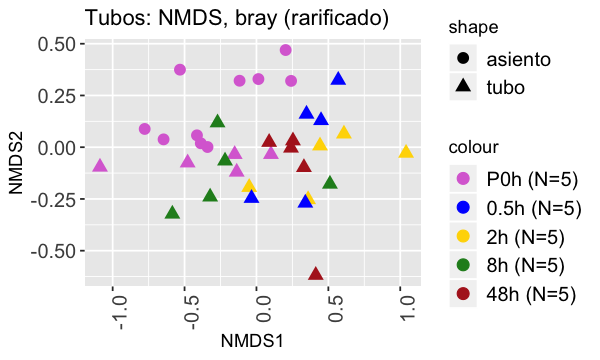

In [23]:
#Not including 0h
cle_tubo=subset_samples(grmetro, cleaning_treatment_no_asiento=="yes" &time_group!="0h")

cle_tubo
sample_data(cle_tubo)$time_group = factor(sample_data(cle_tubo)$time_group, levels = c("P0h","0.5h","2h","8h","48h"))

cle_ordu= ordinate(cle_tubo, "NMDS", "bray")
options(repr.plot.width=5, repr.plot.height=3)

p = plot_ordination(cle_tubo, cle_ordu) 
p = p + geom_point(aes(color = time_group, shape=indoor_surf ), size=3 )
p = p + scale_colour_manual(values = c( "orchid", "blue",
                        "gold1", "forestgreen", "firebrick", "mediumspringgreen", "darkorange1"), 
                        labels = c("P0h (N=5)", "0.5h (N=5)", "2h (N=5)", 
                                                "8h (N=5)", "48h (N=5)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))+
labs(title="Tubos: NMDS, bray (rarificado)")
p


# Calculate distance matrix at OTU level
dist <- phyloseq::distance(cle_tubo, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(cle_tubo))
# Adonis test
adonis(dist ~ time_group, data = sampledf)
pairwise.adonis(dist, time_group, data = sampledf)
# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$time_group)
permutest(beta)

In [24]:
#
cle_tubo1=subset_samples(grmetro, indoor_surf=="tubo"& cleaning_treatment=="yes"& time_group!="0h")

# Calculate distance matrix at OTU level
dist <- phyloseq::distance(cle_tubo1, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(cle_tubo1))
# Adonis test
adonis(dist ~ time_group, data = sampledf)
pairwise.adonis(dist, time_group, data = sampledf)
# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$time_group)
permutest(beta)


Call:
adonis(formula = dist ~ time_group, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)   
time_group  4    0.7210 0.18026  1.4725 0.2275  0.005 **
Residuals  20    2.4484 0.12242         0.7725          
Total      24    3.1694                 1.0000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in pairwise.adonis(dist, time_group, data = sampledf): no se pudo encontrar la función "pairwise.adonis"


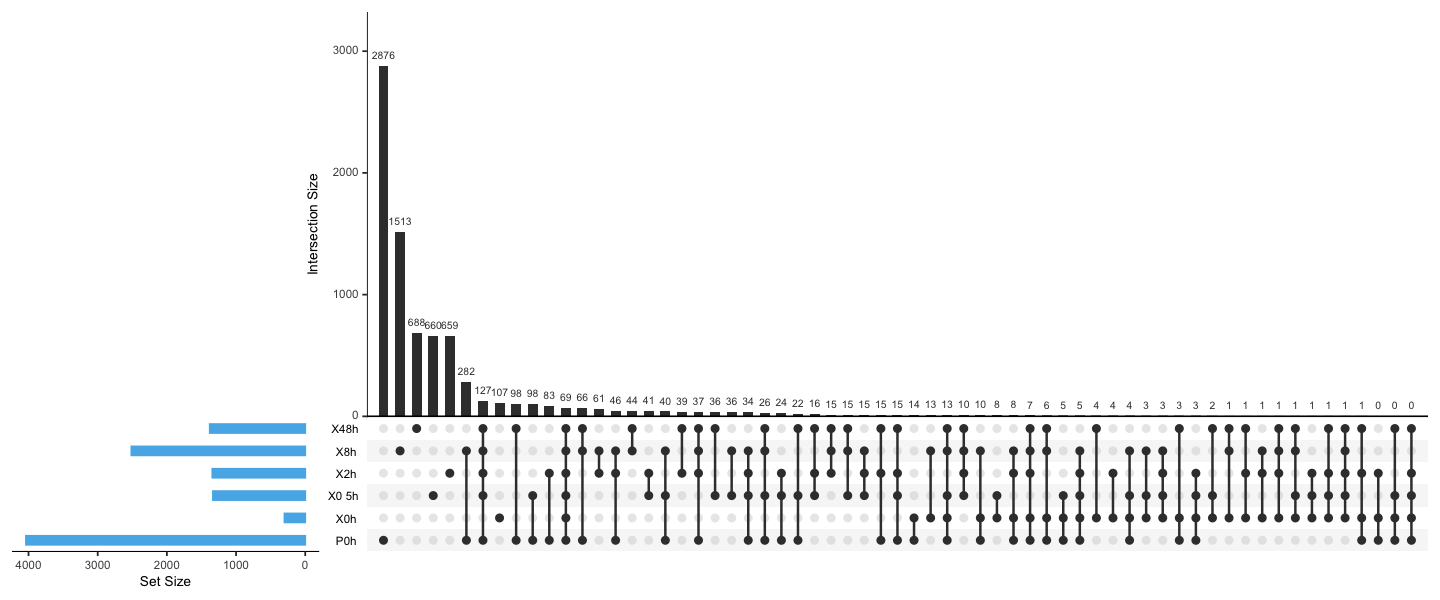

In [5]:
#Unique and shared OTUs among time groups
rcle_tub=subset_samples(rmetro, indoor_surf=="tubo"& cleaning_treatment=="yes")

#sample_data(rcle_asi)$time_group = factor(sample_data(rcle_asi)$time_group, levels = c("P0h","0h","0.5h","2h","8h","48h"))

time=merge_samples(rcle_tub, "time_group", fun=sum)

library(devtools)
#devtools::install_github("hms-dbmi/UpSetR")
library(UpSetR)
sitios2 <- as.table(t(otu_table(time)))
sitios3 <- replace(sitios2, sitios2>0, 1)
sitios3 <- sitios3[which(rowSums(sitios3) > 0),]
write.table(sitios3,"sitios3.tmp")

sitios4 <- read.table("sitios3.tmp", header=TRUE, row.names = 1)

options(repr.plot.width=12, repr.plot.height=5)

upset(sitios4, sets=c("P0h","X0h","X0.5h","X2h","X8h","X48h"),nintersects=NA,
      sets.bar.color = "#56B4E9", order.by = "freq", keep.order=TRUE,empty.intersections = "on")


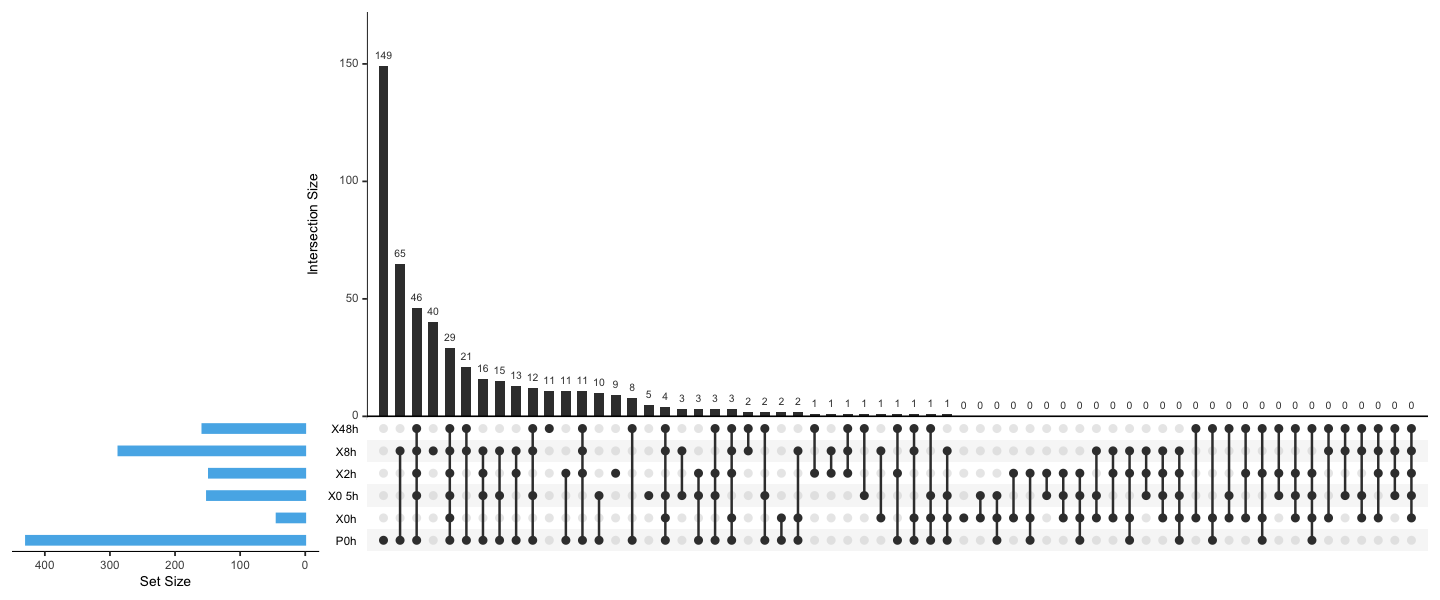

In [6]:
#Unique and shared genera among time groups
rcle_tub=subset_samples(grmetro, indoor_surf=="tubo"& cleaning_treatment=="yes")

#sample_data(rcle_asi)$time_group = factor(sample_data(rcle_asi)$time_group, levels = c("P0h","0h","0.5h","2h","8h","48h"))

time=merge_samples(rcle_tub, "time_group", fun=sum)

library(devtools)
#devtools::install_github("hms-dbmi/UpSetR")
library(UpSetR)
sitios2 <- as.table(t(otu_table(time)))
sitios3 <- replace(sitios2, sitios2>0, 1)
sitios3 <- sitios3[which(rowSums(sitios3) > 0),]
write.table(sitios3,"sitios5.tmp")

sitios6 <- read.table("sitios5.tmp", header=TRUE, row.names = 1)
upset(sitios6, sets=c("P0h","X0h","X0.5h","X2h","X8h","X48h"),nintersects=NA,
      sets.bar.color = "#56B4E9", order.by = "freq", keep.order=TRUE,empty.intersections = "on")